In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from neuralprophet import NeuralProphet
# from fbprophet import Prophet
# from openpyxl.workbook import Workbook
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../forecasting/historical_data/cable_sales_monthly.csv', parse_dates=['ds'])
df.loc[(df['ds'] > '2020-02-01') & (df['ds'] < '2020-12-01'), 'y'] = None
df.tail()

,ds,y
59,2021-12-01,25350.0
60,2022-01-01,22091.0
61,2022-02-01,20243.0
62,2022-03-01,23954.0
63,2022-04-01,22905.0


In [ ]:
# m = NeuralProphet(growth='linear', ## Determine trend types: 'linear', 'discontinuous', 'off'
#                   changepoints=None, ## list of dates that may include change points (None -> automatic )
#                   n_changepoints=5,
#                   changepoints_range=0.8,
#                   trend_reg=0,
#                   trend_reg_threshold=False,
#                   yearly_seasonality=True,
#                   weekly_seasonality=True,
#                   daily_seasonality=True,
#                   seasonality_mode="additive",
#                   seasonality_reg=0,
#                   n_forecasts=1,
#                   n_lags=0,
#                   num_hidden_layers=0,
#                   d_hidden=None,     # Dimension of hidden layers of AR-Net
#                   ar_reg=None,
#                   learning_rate=None,
#                   epochs=None,
#                   batch_size=None,
#                   loss_func="Huber",
#                   optimizer="AdamW",
#                   normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
#                   impute_missing=True,
#                   newer_samples_weight=1.0)


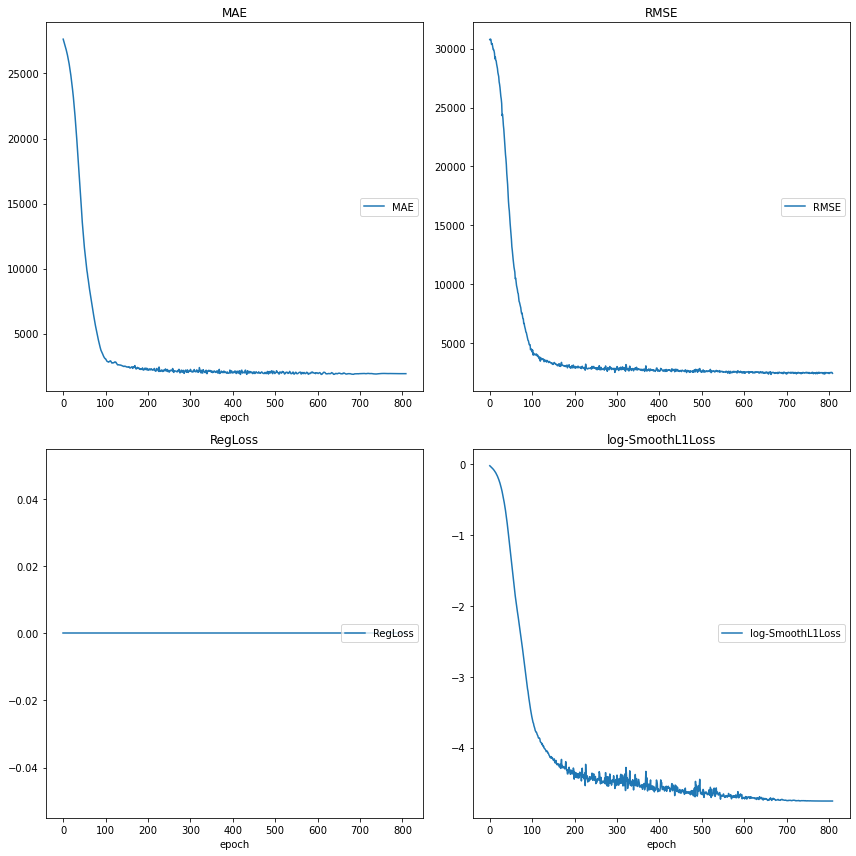

MAE
	MAE              	 (min: 1866.108, max: 27638.548, cur: 1925.635)
RMSE
	RMSE             	 (min: 2335.155, max: 30807.239, cur: 2430.882)
RegLoss
	RegLoss          	 (min:    0.000, max:    0.000, cur:    0.000)
log-SmoothL1Loss
	log-SmoothL1Loss 	 (min:   -4.754, max:   -0.022, cur:   -4.754)


In [9]:
m = NeuralProphet(growth='linear', ## Determine trend types: 'linear', 'discontinuous', 'off'
                  yearly_seasonality=True,
#                   weekly_seasonality=True,
#                   daily_seasonality=True,
                  seasonality_mode="additive",
                  newer_samples_weight=1.0)
metrics = m.fit(df,progress='plot-all')

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 89.062% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.123% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.123% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


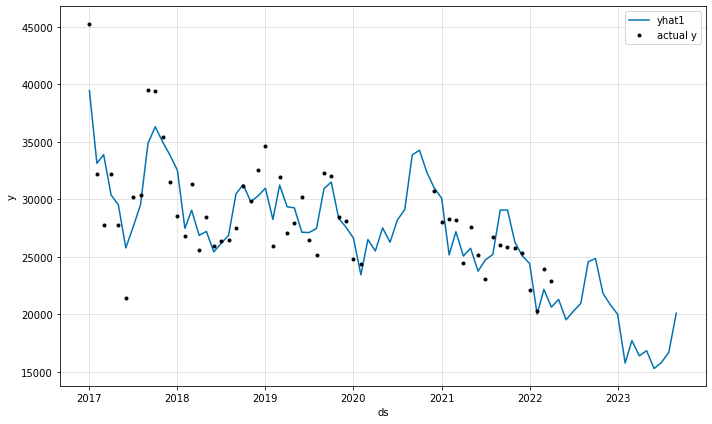

In [4]:
future = m.make_future_dataframe(df, periods=17, n_historic_predictions=len(df))
forecast = m.predict(future)
fig = m.plot(forecast)

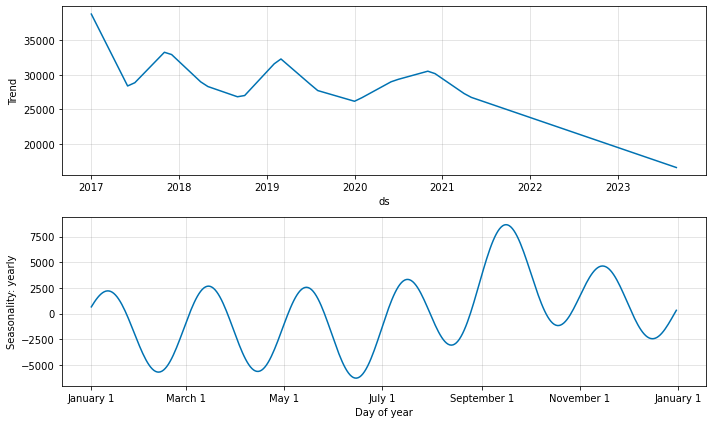

In [5]:
fig_comp = m.plot_components(forecast)


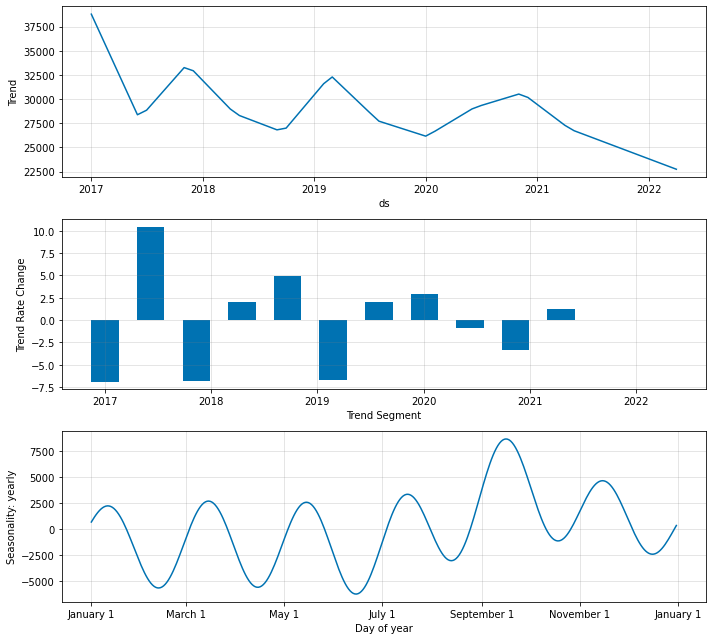

In [6]:
fig_param = m.plot_parameters()

In [8]:
forecast.to_excel('outputs/cable_sales_nn.xlsx')